In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('placement.csv')

In [10]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [12]:
df.shape

(1000, 3)

In [18]:
plt.figure(figsize = (16,4))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

D:\Temp\ipykernel_15808\3034387209.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
D:\Temp\ipykernel_15808\3034387209.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


In [22]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [26]:
sns.boxplot(df['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

In [30]:
### Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [32]:
percentile25

17.0

In [36]:
iqr = percentile75 - percentile25
iqr

27.0

In [40]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [42]:
print('upper_limit', upper_limit)
print('lower_limit', lower_limit)

upper_limit 84.5
lower_limit -23.5


# Finding Outliers

In [45]:
df[df['placement_exam_marks']>upper_limit]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

# Trimming

In [52]:
new_df = df[df['placement_exam_marks']<upper_limit]

In [54]:
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[985 rows x 3 columns]

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

D:\Temp\ipykernel_15808\2827887995.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
D:\Temp\ipykernel_15808\2827887995.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

# Capping

In [63]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [65]:
new_df_cap

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

D:\Temp\ipykernel_15808\3870256369.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
D:\Temp\ipykernel_15808\3870256369.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


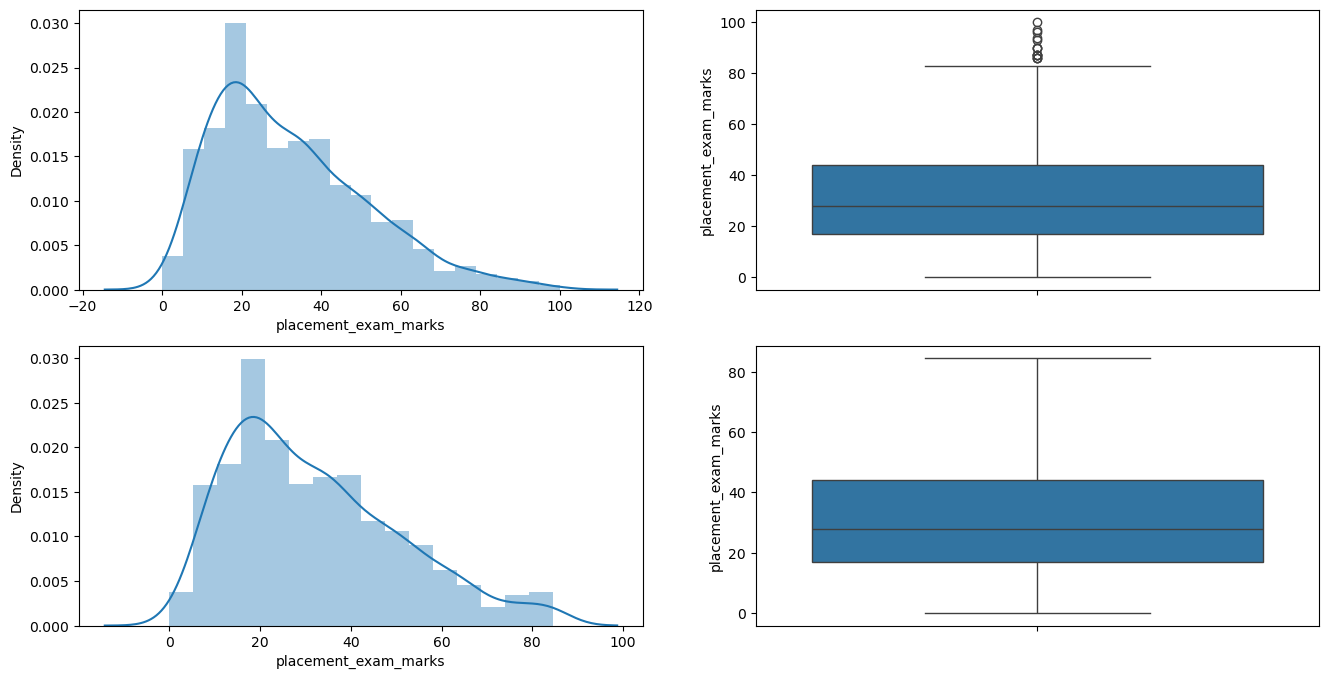

In [67]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()